#2. Eksploracja danych  i regresja liniowa


## 2.1  Korelacja na przykładzie zbioru Iris

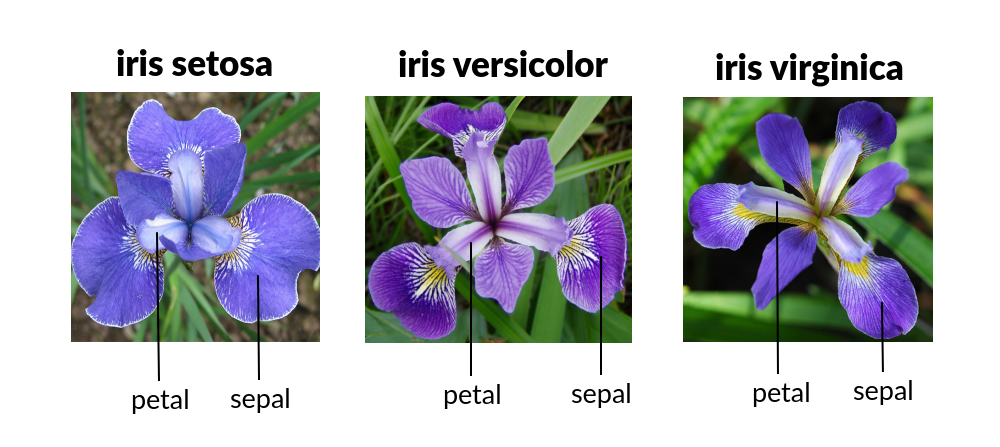

In [16]:
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix

iris_dataset = load_iris() # loading data from sklearn datasets


1. Zbiór danych *iris_dataset* jest słownikiem. Sprawdź jakie ma klucze i wartości. Wypisz dane znajdujące się pod kluczem *'data'* i ich klasyfikację pod *'target'*.

In [17]:
# iris_dataset['data']
# iris_dataset['target']
print(iris_dataset)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

  Żeby utworzyć wykresy korelacji pomiędzy zmiennymi, definiujemy zbiór danych w pandasie:

In [18]:
data_iris = pd.DataFrame(data= np.c_[iris_dataset['data'], iris_dataset['target']],
                     columns= iris_dataset['feature_names'] + ['target'])
iris_dataframe = pd.DataFrame(data_iris, columns=iris_dataset.feature_names)

2. Używając metody pairplot (seaborn) utwórz wykresy korelacji i porównaj je ze zbiorem pokazującym przybliżony współczynnik korelacji dla danych kształtów. Narysuj wykresy tak, żeby dla każdej klasyfikacji (mamy 3 rodzaje irysów) miały inny kolor.

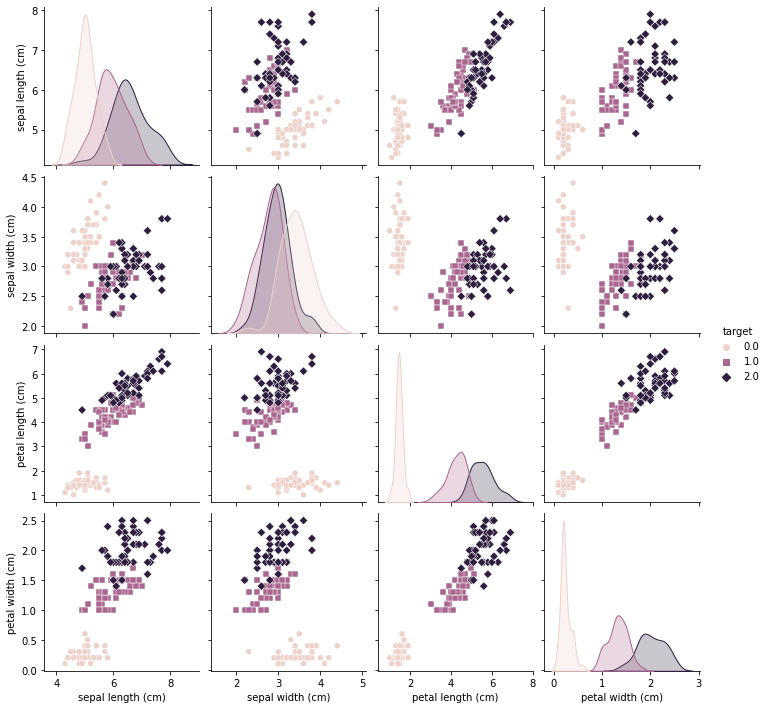

In [19]:
sns.pairplot(data_iris, hue="target", markers=["o", "s", "D"])

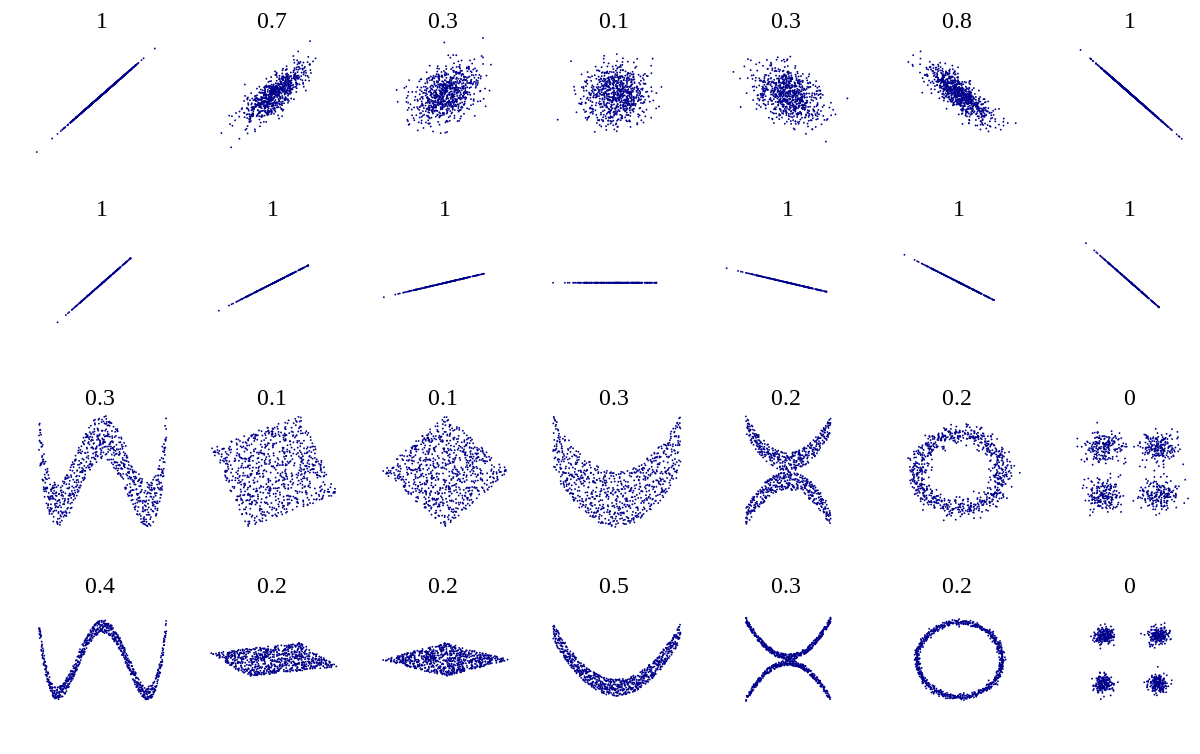

## 1.2  Gradient i regresja liniowa

Teoria krok po kroku (opcjonalnie): <br>
[Link](https://towardsdatascience.com/linear-regression-with-gradient-descent-from-scratch-in-numpy-d894a800a2ca)<br>


1. Zaprojektuj algorytm wykonujący regresję liniową (from scratch) dla ***danych*** poniżej:

*   x = np.array([1., 2., 3., 4.])
*   y = np.array([1.2, 2.8, 5.3, 6.4])
*   a, b (initial parameters) = 0.0, 1.0
*   eta (learning rate) = 0.001
*   epochs = 1000

2. Zbadaj wpływ learning rate na efektywność trenowania (wykres).
3. Zmień wartości parametru y na nieliniowe i zbadaj stabilność algorytmu.
4. Utórz wykres loss function (funkcja kosztu) vs epoka.


In [20]:
error1 = []
error2 = []
error3 = []

In [32]:
a = 0.0
b = 1.0

x = np.array([1., 2., 3., 4.])
y = np.array([3.2, 12.8, 5.3, 8.4])
#eta = [0.001, 0.0001, 0.00001]
eta = 0.001
epochs = 1000
error = []

for epoch in range(epochs):
  cost_a, cost_b = 0, 0
  epoch_cost = 0
  for i in range(len(x)):
    y_pred = (a + b*x[i])
    epoch_cost += (y[i] - y_pred)**2

    for j in range (len(x)):
      partial_a = -2 * (y[j] - (a + b*x[j]))
      partial_b = (-2 * x[j]) * (y[j] - (a + b*x[j]))
      
      cost_a += partial_a
      cost_b += partial_b

    a -= eta * cost_a
    b -= eta * cost_b

  error.append(epoch_cost)


In [22]:
y_preds = a + b*x
print(y_preds)

[6.20998065 7.01999063 7.8300006  8.64001057]


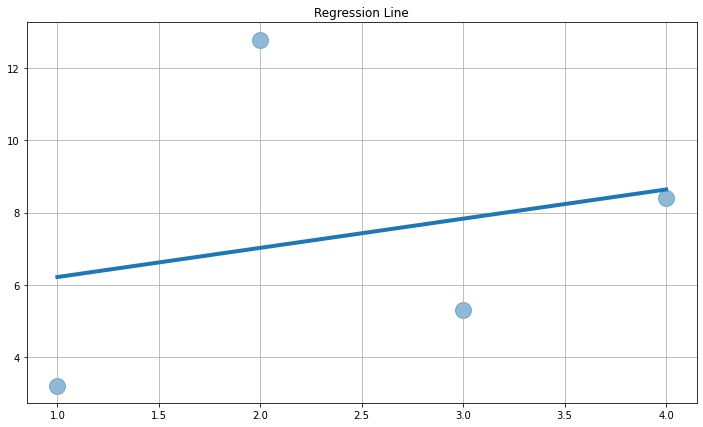

In [23]:
plt.figure(figsize=(12, 7))
plt.title('Regression Line')
plt.scatter(x, y, s=256, alpha=0.5, label='Y')
plt.plot(sorted(x), sorted(y_preds), linewidth=4)
plt.grid()
plt.show()

In [34]:
# print(error2)
len(error3)

0

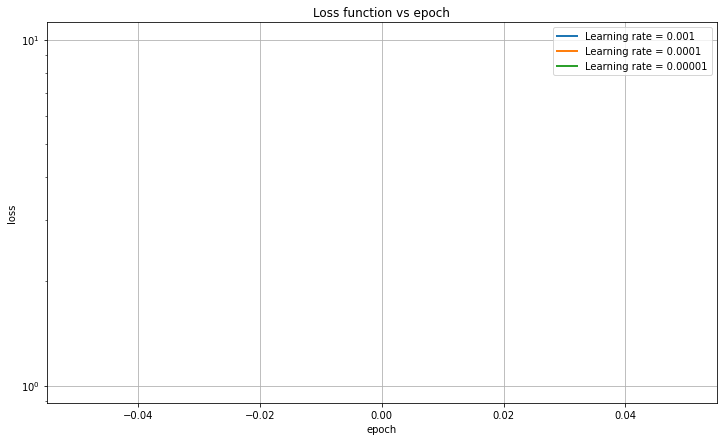

In [36]:
plt.figure(figsize=(12, 7))
plt.title('Loss function vs epoch')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(np.arange(1, len(error1)+1), error1, linewidth=2, label='Learning rate = 0.001')
plt.plot(np.arange(1, len(error2)+1), error2, linewidth=2, label='Learning rate = 0.0001')
plt.plot(np.arange(1, len(error3)+1), error3, linewidth=2, label='Learning rate = 0.00001')
plt.yscale("log")
plt.legend()
plt.grid()
plt.show()

Poniżej przykład regresji (nie tylko już liniowej, przy wykorzystaniu algorytmu w biblotece sklearn!)

In [26]:
# define an exponent
def f(x):
    return np.exp(3 * x)

In [27]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

In [28]:
x = np.array([0, .1, .25, .5, .75, .9, 1])
y = f(x) + 2 * np.random.randn(len(x))

Text(0.5, 1.0, 'Generative model')

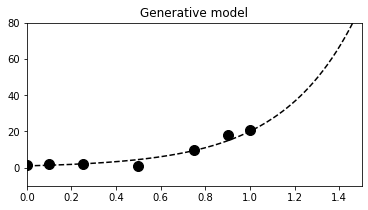

In [29]:

fig, ax = plt.subplots(1, 1, figsize=(6, 3))
ax.plot(x_tr, y_tr, '--k')
ax.plot(x, y, 'ok', ms=10)
ax.set_xlim(0, 1.5)
ax.set_ylim(-10, 80)
ax.set_title('Generative model')